# JAXKnife Tutorial

In [7]:
from jaxknife.jaxknife import bootstrap
from jaxknife.stats_funcs import com_1D
import numpy as np
import matplotlib.pyplot as plt
import scipy

Generate fake 3D position data from a uniform distribution.

In [2]:
seed, size = 1234, 1000
np.random.seed(seed)
data = np.random.uniform(-1, 1, size=(size, 3))

In [3]:
def np_bootstrap(data,statistic_func,n_resamples=1000,seed=0):
    """
    Bootstrap method using numpy and a for loop

    Input: 
    data            (array-like)
    statistic_func  (function)
    n_samples       (int)
    seed            (int)
    """

    est_arr = np.zeros(n_resamples)
    np.random.seed(seed)
 
    for i in range(n_resamples):
        idx = np.random.randint(len(data), size=len(data))
        resample = data[idx]
        
        est_arr[i] = statistic_func(resample)

    return est_arr

Compute center of mass in the $x$ direction with 1000 bootstrap resamples and plot distribution.

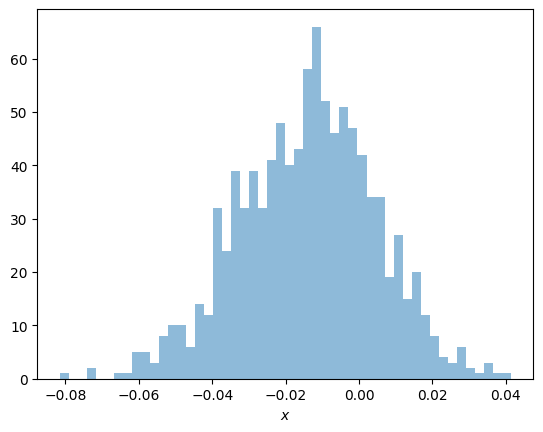

In [4]:
com_arr_boots = bootstrap(data,com_1D,n_resamples=1000,seed=0)
plt.hist(com_arr_boots, bins=50, alpha=0.5)
plt.xlabel(r'$x$');

In [5]:
%timeit com_arr_boots = np_bootstrap(data,com_1D,n_resamples=1000,seed=0)

712 ms ± 56.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit com_arr_boots = bootstrap(data,com_1D,n_resamples=1000,seed=0)

62.7 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
